In [1]:
from datetime import datetime, date, time

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib
import matplotlib.pyplot as plt

import statistics

pd.set_option('display.max_columns', 300)

tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}
from matplotlib import rcParams
rcParams['font.family'] = 'Liberation Sans Narrow'

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
London = gpd.read_file('../data/london_general/London_boundaries.geojson')

lsoa = gpd.read_file('../data/london_general/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp')
lsoa = lsoa.to_crs('epsg:27700')

msoa = gpd.read_file('../data/london_general/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
msoa = msoa.to_crs('epsg:27700')

In [3]:
msoa_cropped = gpd.read_file('../data/output.msoa_cropped.geojson')

In [4]:
df2019 = pd.read_csv('../data/cycling/2019.csv')
df2020 = pd.read_csv('../data/cycling/usage_weekly/2020.csv')
df2021 = pd.read_csv('../data/cycling/usage_weekly/2021.csv')

In [42]:
print(df2019.shape)
print(df2020.shape)
print(df2021.shape)

df2021.head(2)

(10388411, 9)
(10255326, 9)
(6168961, 9)


,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,108030406,780,17800,20/05/2021 20:34,361,"Waterloo Station 2, Waterloo",20/05/2021 20:21,166,"Seville Street, Knightsbridge"
1,108008518,1140,20453,20/05/2021 08:04,292,"Montpelier Street, Knightsbridge",20/05/2021 07:45,374,"Waterloo Station 1, Waterloo"


In [6]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168961 entries, 0 to 6168960
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Rental Id          int64 
 1   Duration           int64 
 2   Bike Id            int64 
 3   End Date           object
 4   EndStation Id      int64 
 5   EndStation Name    object
 6   Start Date         object
 7   StartStation Id    int64 
 8   StartStation Name  object
dtypes: int64(5), object(4)
memory usage: 423.6+ MB


In [41]:
df_list = [df2019, df2020, df2021]

In [43]:
for df in df_list:
    df['start_time'] = pd.to_datetime(df['Start Date'].values, infer_datetime_format=True)
    df['end_time'] = pd.to_datetime(df['End Date'].values, infer_datetime_format=True)
    df.index = df.end_time.values

In [9]:
daily_cycles2019 = pd.DataFrame(df2019.end_time.resample('D').size())
weekly_cycles2019 = pd.DataFrame(daily_cycles2019.end_time.resample('W').mean())
rolling_cycles2019 = pd.DataFrame(daily_cycles2019.end_time.rolling(7, center=True).mean())

daily_cycles2020 = pd.DataFrame(df2020.end_time.resample('D').size())
weekly_cycles2020 = pd.DataFrame(daily_cycles2020.end_time.resample('W').mean())
rolling_cycles2020 = pd.DataFrame(daily_cycles2020.end_time.rolling(7, center=True).mean())

daily_cycles2021 = pd.DataFrame(df2021.end_time.resample('D').size())
weekly_cycles2021 = pd.DataFrame(daily_cycles2021.end_time.resample('W').mean())
rolling_cycles2021 = pd.DataFrame(daily_cycles2021.end_time.rolling(7, center=True).mean())

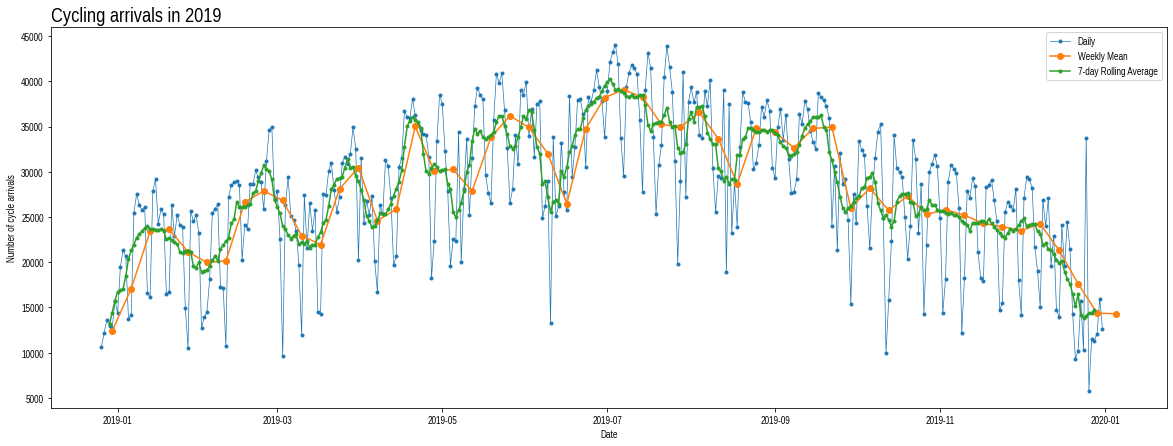

In [10]:
fig, ax = plt.subplots(figsize=(20,7))

ax.plot(daily_cycles2019,
        marker='.', linewidth=0.7, label='Daily'
       )
ax.plot(weekly_cycles2019,
       marker='o', label='Weekly Mean'
       )

ax.plot(rolling_cycles2019,
       marker='.', label='7-day Rolling Average'
       )

ax.set_ylabel('Number of cycle arrivals')
ax.set_xlabel('Date')
ax.set_title('Cycling arrivals in 2019', size=20,loc='left', **tfont)
ax.legend();

# fig.savefig('../export/cycling_timeseries2019')

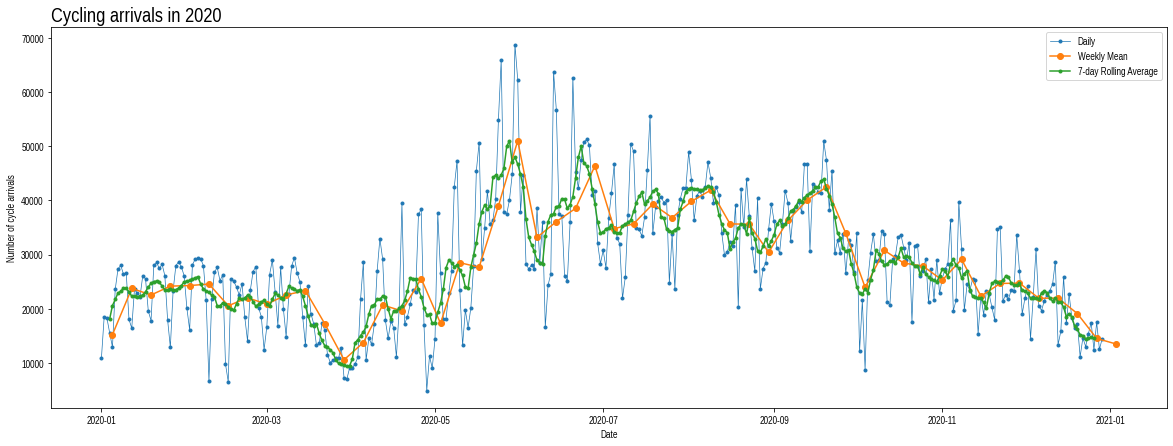

In [11]:
fig, ax = plt.subplots(figsize=(20,7))

ax.plot(daily_cycles2020,
        marker='.', linewidth=0.7, label='Daily'
       )
ax.plot(weekly_cycles2020,
       marker='o', label='Weekly Mean'
       )

ax.plot(rolling_cycles2020,
       marker='.', label='7-day Rolling Average'
       )

ax.set_ylabel('Number of cycle arrivals')
ax.set_xlabel('Date')
ax.set_title('Cycling arrivals in 2020', size=20,loc='left', **tfont)
ax.legend();

# fig.savefig('../export/cycling_timeseries2019')

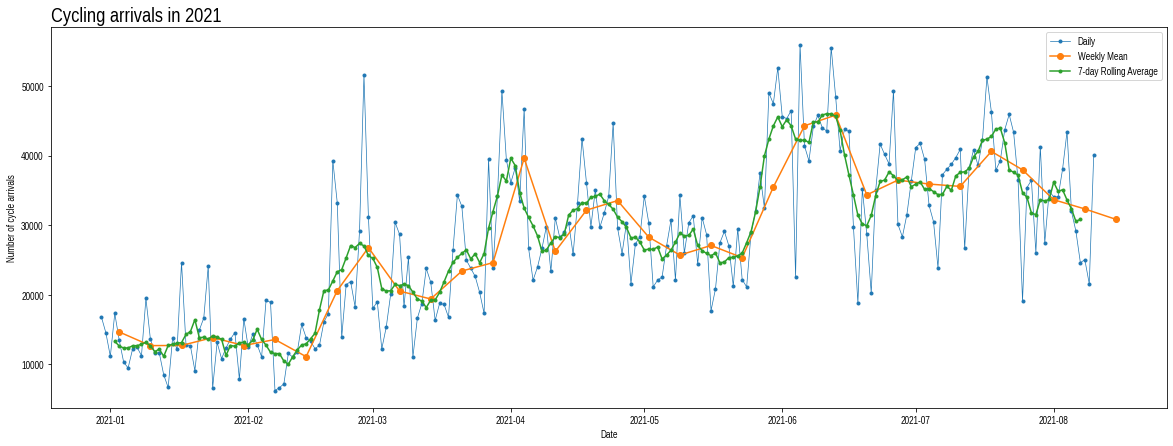

In [12]:
fig, ax = plt.subplots(figsize=(20,7))

ax.plot(daily_cycles2021,
        marker='.', linewidth=0.7, label='Daily'
       )
ax.plot(weekly_cycles2021,
       marker='o', label='Weekly Mean'
       )

ax.plot(rolling_cycles2021,
       marker='.', label='7-day Rolling Average'
       )

ax.set_ylabel('Number of cycle arrivals')
ax.set_xlabel('Date')
ax.set_title('Cycling arrivals in 2021', size=20,loc='left', **tfont)
ax.legend();

# fig.savefig('../export/cycling_timeseries2019')

### Filter by month

In [8]:
# cycles201906 = df2019.loc[df2019['end_time'].dt.month==6]
# cycles202006 = df2020.loc[df2020['end_time'].dt.month==6]
# cycles202106 = df2021.loc[df2021['end_time'].dt.month==6]

In [9]:
# cycles201906.to_csv('../data/cycling/usage_weekly/cycles201906.csv', index=False)
# cycles202006.to_csv('../data/cycling/usage_weekly/cycles202006.csv', index=False)
# cycles202106.to_csv('../data/cycling/usage_weekly/cycles202106.csv', index=False)

cycles201906 = pd.read_csv('../data/cycling/usage_weekly/cycles201906.csv')
cycles202006 = pd.read_csv('../data/cycling/usage_weekly/cycles202006.csv')
cycles202106 = pd.read_csv('../data/cycling/usage_weekly/cycles202106.csv')

In [28]:
df_list_June = [cycles201906, cycles202006, cycles202106]

In [29]:
for df in df_list_June:
    df['end_time'] = pd.to_datetime(df['End Date'].values, infer_datetime_format=True)
    df['hour'] = df['end_time'].dt.hour
    df['day'] = df['end_time'].dt.date
#     df.reset_index(drop=True, inplace=True)

In [ ]:
cycles201906.head(2)

In [17]:
cycles201906_dh_totals = cycles201906.groupby(['day','hour']).size().unstack().reset_index()
cycles202006_dh_totals = cycles202006.groupby(['day','hour']).size().unstack().reset_index()
cycles202106_dh_totals = cycles202106.groupby(['day','hour']).size().unstack().reset_index()

In [18]:
cycles201906_dh_totals.to_csv('../data/cycling/bike201906_dh_totals.csv', index=False)
cycles202006_dh_totals.to_csv('../data/cycling/bike202006_dh_totals.csv', index=False)
cycles202106_dh_totals.to_csv('../data/cycling/bike202106_dh_totals.csv', index=False)

In [19]:
cycles201906_dh_totals = pd.read_csv('../data/cycling/bike201906_dh_totals.csv')
cycles202006_dh_totals = pd.read_csv('../data/cycling/bike202006_dh_totals.csv')
cycles202106_dh_totals = pd.read_csv('../data/cycling/bike202106_dh_totals.csv')

## Total arrivals over all stations per day

In [20]:
cycles201906_dh_totals.head()

,day,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2019-06-01,709,460,305,224,120,116,160,350,614,...,3424,3327,3482,3353,3264,2831,1689,1135,1329,1397
1,2019-06-02,1196,704,475,283,194,127,146,206,456,...,3117,3289,2966,2689,2573,1993,1375,970,789,652
2,2019-06-03,262,194,120,61,55,138,636,2086,4448,...,1445,1417,2006,4011,4867,2988,1795,1141,731,446
3,2019-06-04,271,138,82,57,67,155,681,2265,4884,...,1014,670,920,2388,3956,2507,1641,1212,822,511
4,2019-06-05,184,153,80,47,59,141,696,2248,4803,...,1379,1455,1986,3876,4488,2817,1718,1238,894,572


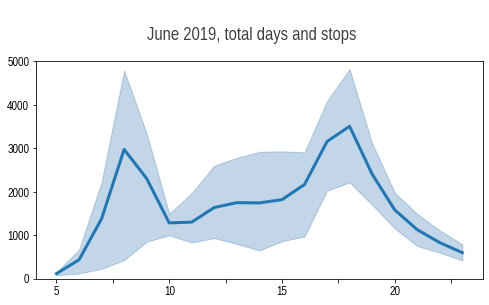

In [23]:
fig, ax = plt.subplots(figsize=(8,4))

df_dh = cycles201906_dh_totals.iloc[:, 6:]

x = df_dh.mean()

x.plot(ax=ax, linewidth=3)
q1 = df_dh.quantile(0.1)
q3 = df_dh.quantile(0.9)
ax.fill_between(x.index, q1, q3, color='#0C5DA5', alpha=0.25);

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

# ax.axhline(y = 0, color = 'black', linewidth = 3.3, alpha = .7)
# ax.axvline(x = 0, color = 'black', linewidth = 5, alpha = .7)

ax.set_ylim(bottom = 0, top = 5000);

ax.text(x = 4, y = 5500, s = "\nJune 2019, total days and stops",
               fontsize = 18, alpha = .75);

# fig.savefig('../export/cycle_total_hourly_201906_v1')

In [194]:
import matplotlib.style as style
# style.available

style.use('fivethirtyeight')
# style.use('ggplot')

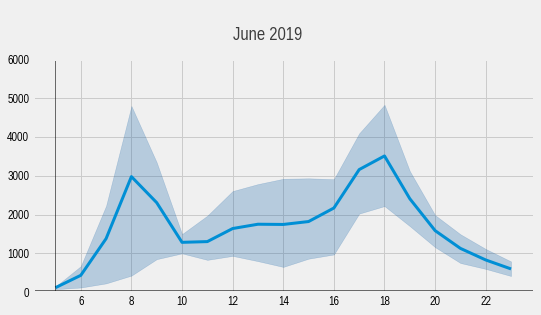

In [25]:
fig, ax = plt.subplots(figsize=(8,4))

df_dh = cycles201906_dh_totals.iloc[:, 6:]

x = df_dh.mean()

x.plot(ax=ax, linewidth=3)
q1 = df_dh.quantile(0.1)
q3 = df_dh.quantile(0.9)
ax.fill_between(x.index, q1, q3, color='#0C5DA5', alpha=0.25);

x_ticks = ['6','8','10','12','14','16','18','20','22']
x_ticks_labels = [6,8,10,12,14,16,18,20,22]

ax.set_xticks(x_ticks) 
ax.set_xticklabels(x_ticks_labels)

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax.set_ylim(bottom = 0, top = 6000)

ax.axhline(y = 50, color = 'black', linewidth = 0.8, alpha = .7)
ax.axvline(x = 0, color = 'black', linewidth = 0.8, alpha = .7)

# ax.text(x = 4, y = 5500, s = "\nJune 2019, total arrivals at bike stations",
ax.text(x = 7, y = 6500, s = "\nJune 2019",
               fontsize = 18, alpha = .75);

# fig.savefig('../export/cycles_total_hourly_201906')

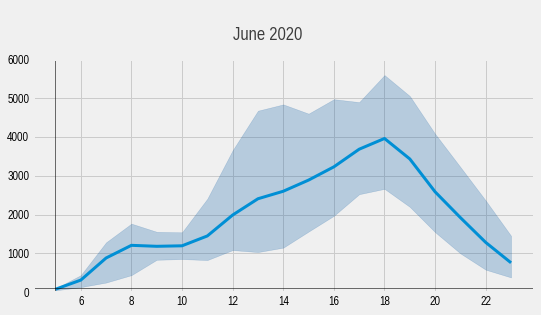

In [26]:
fig, ax = plt.subplots(figsize=(8,4))

df_dh = cycles202006_dh_totals.iloc[:, 6:]

x = df_dh.mean()

x.plot(ax=ax, linewidth=3)
q1 = df_dh.quantile(0.1)
q3 = df_dh.quantile(0.9)
ax.fill_between(x.index, q1, q3, color='#0C5DA5', alpha=0.25);

x_ticks = ['6','8','10','12','14','16','18','20','22']
x_ticks_labels = [6,8,10,12,14,16,18,20,22]

ax.set_xticks(x_ticks) 
ax.set_xticklabels(x_ticks_labels)

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax.set_ylim(bottom = 0, top = 6000)

ax.axhline(y = 100, color = 'black', linewidth = 0.8, alpha = .7)
ax.axvline(x = 0, color = 'black', linewidth = 0.8, alpha = .7)

ax.text(x = 7, y = 6500, s = "\nJune 2020",
               fontsize = 18, alpha = .75);

# fig.savefig('../export/cycles_total_hourly_202006')

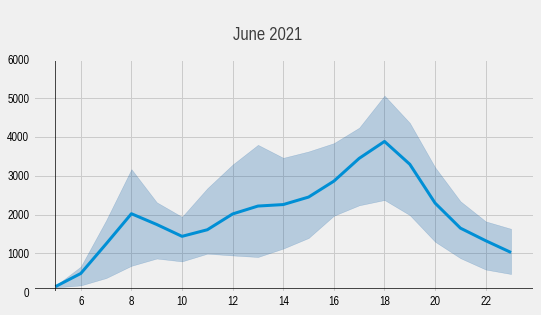

In [27]:
fig, ax = plt.subplots(figsize=(8,4))

df_dh = cycles202106_dh_totals.iloc[:, 6:]

x = df_dh.mean()

x.plot(ax=ax, linewidth=3)
q1 = df_dh.quantile(0.1)
q3 = df_dh.quantile(0.9)
ax.fill_between(x.index, q1, q3, color='#0C5DA5', alpha=0.25);

x_ticks = ['6','8','10','12','14','16','18','20','22']
x_ticks_labels = [6,8,10,12,14,16,18,20,22]

ax.set_xticks(x_ticks) 
ax.set_xticklabels(x_ticks_labels)

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax.set_ylim(bottom = 0, top = 6000)

ax.axhline(y = 100, color = 'black', linewidth = 1, alpha = .7)
ax.axvline(x = 0, color = 'black', linewidth = 1, alpha = .7)

ax.text(x = 7, y = 6500, s = "\nJune 2021",
               fontsize = 18, alpha = .75);

# fig.savefig('../export/cycles_total_hourly_202106')

### Graphs for days of week

In [28]:
df_list_dh = [cycles201906_dh_totals, cycles202006_dh_totals, cycles202106_dh_totals]

In [29]:
cycles202106_dh_totals.head()

,day,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2021-06-01,534,315,191,108,97,138,524,1284,2255,...,2490,2887,3322,4214,5139,4472,3342,2345,1611,1028
1,2021-06-02,374,346,168,110,92,153,618,1508,2512,...,2498,2694,3343,4383,4877,4014,2772,2186,1685,1149
2,2021-06-03,586,339,195,121,101,166,551,1627,2570,...,2380,2715,3107,4217,5044,4198,3199,2340,1828,1334
3,2021-06-04,757,409,224,177,108,179,601,1342,2034,...,553,647,998,1883,2375,2081,1355,1011,985,894
4,2021-06-05,823,578,442,294,169,111,194,479,809,...,4416,4600,4831,4921,4788,4477,3480,2715,2031,1687


In [30]:
for df in df_list_dh:
    df['d'] = pd.to_datetime(df['day'].values, infer_datetime_format=True)
    # create dayofweek column with Monday=0 and Sunday=6
    df['dow'] = df.d.dt.dayofweek
    conditions = [df['dow']==0, df['dow']==1, df['dow']==2, df['dow']==3, df['dow']==4, df['dow']==5, df['dow']==6
             ]
    values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['dayofweek'] = np.select(conditions, values)

In [31]:
#2019
weekday201906 = cycles201906_dh_totals.loc[(cycles201906_dh_totals['dayofweek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])), '5':'23']
friday201906 = cycles201906_dh_totals.loc[(cycles201906_dh_totals['dayofweek']=='Friday'), '5':'23']
saturday201906 = cycles201906_dh_totals.loc[(cycles201906_dh_totals['dayofweek']=='Saturday'), '5':'23']
sunday201906 = cycles201906_dh_totals.loc[(cycles201906_dh_totals['dayofweek']=='Sunday'), '5':'23']

a = weekday201906.mean()
b = friday201906.mean()
c = saturday201906.mean()
d = sunday201906.mean()

dow_hourly_201906 = pd.DataFrame(list(zip(a,b,c,d)), columns=['weekday', 'friday', 'saturday', 'sunday'],
                                index=range(5,24))

#2020
weekday202006 = cycles202006_dh_totals.loc[(cycles202006_dh_totals['dayofweek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])), '5':'23']
friday202006 = cycles202006_dh_totals.loc[(cycles202006_dh_totals['dayofweek']=='Friday'), '5':'23']
saturday202006 = cycles202006_dh_totals.loc[(cycles202006_dh_totals['dayofweek']=='Saturday'), '5':'23']
sunday202006 = cycles202006_dh_totals.loc[(cycles202006_dh_totals['dayofweek']=='Sunday'), '5':'23']

a = weekday202006.mean()
b = friday202006.mean()
c = saturday202006.mean()
d = sunday202006.mean()

dow_hourly_202006 = pd.DataFrame(list(zip(a,b,c,d)), columns=['weekday', 'friday', 'saturday', 'sunday'],
                                index=range(5,24))

#2021
weekday202106 = cycles202106_dh_totals.loc[(cycles202106_dh_totals['dayofweek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])), '5':'23']
friday202106 = cycles202106_dh_totals.loc[(cycles202106_dh_totals['dayofweek']=='Friday'), '5':'23']
saturday202106 = cycles202106_dh_totals.loc[(cycles202106_dh_totals['dayofweek']=='Saturday'), '5':'23']
sunday202106 = cycles202106_dh_totals.loc[(cycles202106_dh_totals['dayofweek']=='Sunday'), '5':'23']

a = weekday202106.mean()
b = friday202106.mean()
c = saturday202106.mean()
d = sunday202106.mean()

dow_hourly_202106 = pd.DataFrame(list(zip(a,b,c,d)), columns=['weekday', 'friday', 'saturday', 'sunday'],
                                index=range(5,24))

In [32]:
Col1 = '#fb9a99' #red
Col2 = '#e31a1c'

Col3 = '#4db8ff' #blue
Col4 = '#0000e6'

Col5 = '#33cc33' # green
Col6 = '#009933'

colors = [Col1, Col2, Col3, Col4, Col5, Col6]

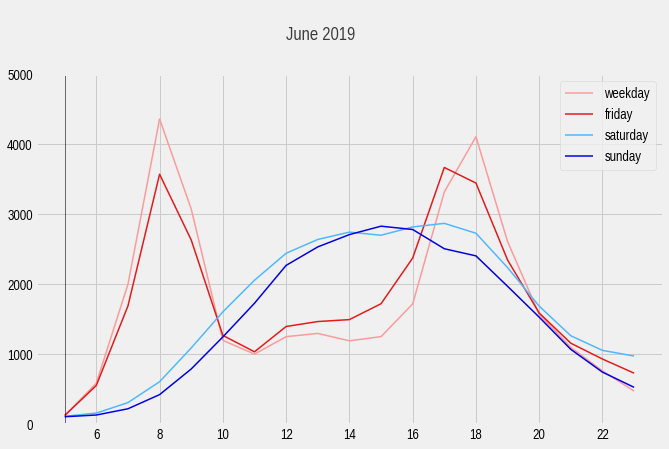

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

h_plot = dow_hourly_201906.plot(ax=ax, linewidth=1.5, color = colors)
x_ticks = [6,8,10,12,14,16,18,20,22]
x_ticks_labels = [6,8,10,12,14,16,18,20,22]

ax.set_xticks(x_ticks) 
ax.set_xticklabels(x_ticks_labels)

h_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)

h_plot.axhline(y = 0, color = 'black', linewidth = 0.8, alpha = .7)
h_plot.axvline(x = 5, color = 'black', linewidth = 0.8, alpha = .7);

h_plot.set_ylim(bottom = 0, top = 5000);

h_plot.text(x = 12, y = 5500, s = "\nJune 2019",
               fontsize = 18, alpha = .75);

# fig.savefig('../export/cycles_dow_201906')

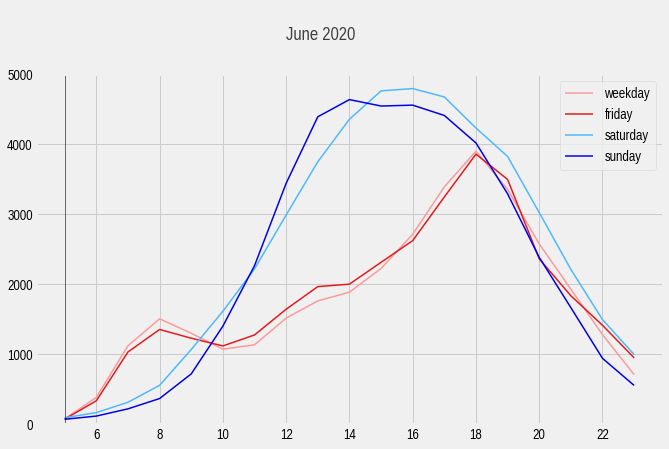

In [34]:
fig, ax = plt.subplots(figsize=(10,6))

h_plot = dow_hourly_202006.plot(ax=ax, linewidth=1.5, color = colors)
x_ticks = [6,8,10,12,14,16,18,20,22]
x_ticks_labels = [6,8,10,12,14,16,18,20,22]

ax.set_xticks(x_ticks) 
ax.set_xticklabels(x_ticks_labels)

h_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)

h_plot.axhline(y = 0, color = 'black', linewidth = 0.8, alpha = .7)
h_plot.axvline(x = 5, color = 'black', linewidth = 0.8, alpha = .7);

h_plot.set_ylim(bottom = 0, top = 5000);

h_plot.text(x = 12, y = 5500, s = "\nJune 2020",
               fontsize = 18, alpha = .75);

# fig.savefig('../export/cycles_dow_202006')

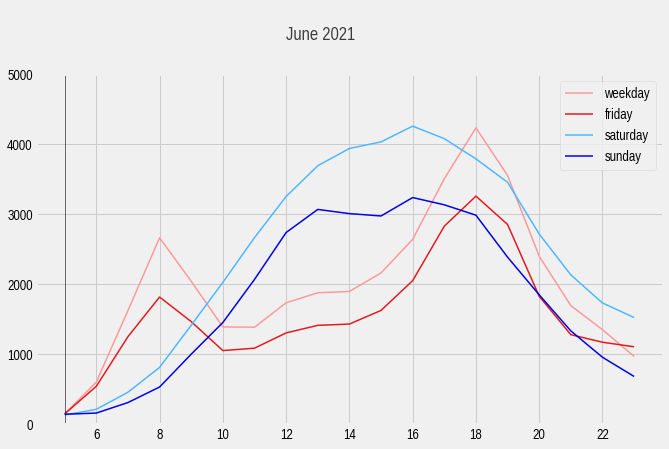

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

h_plot = dow_hourly_202106.plot(ax=ax, linewidth=1.5, color = colors)
x_ticks = [6,8,10,12,14,16,18,20,22]
x_ticks_labels = [6,8,10,12,14,16,18,20,22]

ax.set_xticks(x_ticks) 
ax.set_xticklabels(x_ticks_labels)

h_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)

h_plot.axhline(y = 0, color = 'black', linewidth = 0.8, alpha = .7)
h_plot.axvline(x = 5, color = 'black', linewidth = 0.8, alpha = .7);

h_plot.set_ylim(bottom = 0, top = 5000);

h_plot.text(x = 12, y = 5500, s = "\nJune 2021",
               fontsize = 18, alpha = .75);

# fig.savefig('../export/cycles_dow_202106')

### Join with stations

In [6]:
msoa_cropped = gpd.read_file('../data/output.msoa_cropped.geojson')
station_to_msoa = pd.read_csv('../data/cycling/station_to_msoa.csv')
station_to_msoa = station_to_msoa[['station_name', 'MSOA11CD', 'MSOA11NM']]

In [30]:
cycles201906.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,start_time,end_time,hour,day
0,87827398,180,5646,12/06/2019 16:07,94,"Bricklayers Arms, Borough",12/06/2019 16:04,269,"Empire Square, The Borough",2019-06-12 16:04:00,2019-12-06 16:07:00,16,2019-12-06
1,87914057,180,2235,15/06/2019 15:18,269,"Empire Square, The Borough",15/06/2019 15:15,94,"Bricklayers Arms, Borough",2019-06-15 15:15:00,2019-06-15 15:18:00,15,2019-06-15
2,87825864,840,14849,12/06/2019 13:42,194,"Hop Exchange, The Borough",12/06/2019 13:28,829,"Wynne Road, Stockwell",2019-06-12 13:28:00,2019-12-06 13:42:00,13,2019-12-06
3,87956625,1560,8253,17/06/2019 07:43,564,"Somerset House, Strand",17/06/2019 07:17,510,"Westferry DLR, Limehouse",2019-06-17 07:17:00,2019-06-17 07:43:00,7,2019-06-17
4,87967878,540,4199,17/06/2019 11:39,564,"Somerset House, Strand",17/06/2019 11:30,641,"Archbishop's Park, Waterloo",2019-06-17 11:30:00,2019-06-17 11:39:00,11,2019-06-17


In [6]:
cycles201906_station_sum = cycles201906.groupby(['EndStation Name','day']).size().reset_index(level=[0,1])
cycles202006_station_sum = cycles202006.groupby(['EndStation Name','day']).size().reset_index(level=[0,1])
cycles202106_station_sum = cycles202106.groupby(['EndStation Name','day']).size().reset_index(level=[0,1])

### Duration (need to remove it below)

In [41]:
cycles201906_duration = cycles201906.groupby(['EndStation Name','day']).aggregate({'Duration':'mean'}).reset_index(level=[0,1])
cycles202006_duration = cycles202006.groupby(['EndStation Name','day']).aggregate({'Duration':'mean'}).reset_index(level=[0,1])
cycles202106_duration = cycles202106.groupby(['EndStation Name','day']).aggregate({'Duration':'mean'}).reset_index(level=[0,1])

In [42]:
duration_list = [cycles201906_duration, cycles202006_duration, cycles202106_duration]

In [43]:
for df in duration_list:
    df.columns = ['end_station', 'day', 'av_time']
    df['av_time'] = np.round(df['av_time']/60, 1)
    df['d'] = pd.to_datetime(df['day'].values, infer_datetime_format=True)
    # create dayofweek column with Monday=0 and Sunday=6
    df['dow'] = df.d.dt.dayofweek
    conditions = [df['dow']==0, df['dow']==1, df['dow']==2, df['dow']==3, df['dow']==4, df['dow']==5, df['dow']==6
             ]
    values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['dayofweek'] = np.select(conditions, values)

In [50]:
cycles_201906_dur_weekend = cycles201906_duration[cycles201906_duration['dayofweek'].isin(['Saturday', 'Sunday'])]
cycles_202006_dur_weekend = cycles202006_duration[cycles202006_duration['dayofweek'].isin(['Saturday', 'Sunday'])]
cycles_202106_dur_weekend = cycles202106_duration[cycles202106_duration['dayofweek'].isin(['Saturday', 'Sunday'])]

In [51]:
duration_list_w = [cycles_201906_dur_weekend, cycles_202006_dur_weekend, cycles_202106_dur_weekend]

for df in duration_list_w:
    df['end_station_short'] = df['end_station'].str.split(',').str[0].str.strip()
    df['end_station_short'] = df['end_station_short'].str.replace(r'(\d)$','',regex=True).str.strip()
    df['end_station_short'] = df['end_station_short'].str.replace('  ', ' ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [52]:
station_to_msoa['station_name_short'] = station_to_msoa['station_name'].str.split(',').str[0].str.strip()
station_to_msoa['station_name_short'] = station_to_msoa['station_name_short'
                                                       ].str.replace(r'(\d)$','',regex=True).str.strip()

In [65]:
cycles_dur_201906 = cycles_201906_dur_weekend.merge(station_to_msoa, how='left', 
                                             left_on='end_station', right_on='station_name')
cycles_dur_202006 = cycles_202006_dur_weekend.merge(station_to_msoa, how='left', 
                                             left_on='end_station', right_on='station_name')
cycles_dur_202106 = cycles_202106_dur_weekend.merge(station_to_msoa, how='left', 
                                                left_on='end_station', right_on='station_name')

In [66]:
cycles_dur_201906 = cycles_dur_201906.merge(station_to_msoa, how='left', 
                                             left_on='end_station_short', right_on='station_name_short')
cycles_dur_202006 = cycles_dur_202006.merge(station_to_msoa, how='left', 
                                             left_on='end_station_short', right_on='station_name_short')
cycles_dur_202106 = cycles_dur_202106.merge(station_to_msoa, how='left', 
                                                left_on='end_station_short', right_on='station_name_short')

In [67]:
for df in [cycles_dur_201906, cycles_dur_202006, cycles_dur_202106]:
    df.loc[~df['station_name_x'].isna(), 'station_name'] = df['station_name_x']
    df.loc[df['station_name_x'].isna(), 'station_name'] = df['station_name_y']
    df.loc[~df['station_name_x'].isna(), 'MSOA11NM'] = df['MSOA11NM_x']
    df.loc[df['station_name_x'].isna(), 'MSOA11NM'] = df['MSOA11NM_y']
    df.loc[~df['station_name_x'].isna(), 'MSOA11CD'] = df['MSOA11CD_x']
    df.loc[df['station_name_x'].isna(), 'MSOA11CD'] = df['MSOA11CD_y']
    df.drop(columns=['station_name_x', 'MSOA11CD_x','MSOA11NM_x', 
                     'station_name_short_x', 'station_name_y', 'MSOA11CD_y','MSOA11NM_y', 
                     'station_name_short_y'], inplace=True)

In [70]:
cycles_dur_202106.head()

,end_station,day,av_time,d,dow,dayofweek,end_station_short,station_name,MSOA11NM,MSOA11CD
0,"Abbey Orchard Street, Westminster",2021-06-05,31.7,2021-06-05,5,Saturday,Abbey Orchard Street,"Abbey Orchard Street, Westminster",Westminster 020,E02000979
1,"Abbey Orchard Street, Westminster",2021-06-06,26.6,2021-06-06,6,Sunday,Abbey Orchard Street,"Abbey Orchard Street, Westminster",Westminster 020,E02000979
2,"Abbey Orchard Street, Westminster",2021-06-12,23.4,2021-06-12,5,Saturday,Abbey Orchard Street,"Abbey Orchard Street, Westminster",Westminster 020,E02000979
3,"Abbey Orchard Street, Westminster",2021-06-13,28.3,2021-06-13,6,Sunday,Abbey Orchard Street,"Abbey Orchard Street, Westminster",Westminster 020,E02000979
4,"Abbey Orchard Street, Westminster",2021-06-19,41.3,2021-06-19,5,Saturday,Abbey Orchard Street,"Abbey Orchard Street, Westminster",Westminster 020,E02000979


In [77]:
c_dur_msoa_d_201906 = cycles_dur_201906[['MSOA11CD','day','av_time']].groupby(['MSOA11CD','day']).agg({'av_time':'median'}).reset_index()
c_dur_msoa_d_202006 = cycles_dur_202006[['MSOA11CD','day','av_time']].groupby(['MSOA11CD','day']).agg({'av_time':'median'}).reset_index()
c_dur_msoa_d_202106 = cycles_dur_202106[['MSOA11CD','day','av_time']].groupby(['MSOA11CD','day']).agg({'av_time':'median'}).reset_index()

In [78]:
c_dur_msoa_201906 = c_dur_msoa_d_201906.groupby(['MSOA11CD']).agg({'av_time':'median'}).reset_index()
c_dur_msoa_202006 = c_dur_msoa_d_202006.groupby(['MSOA11CD']).agg({'av_time':'median'}).reset_index()
c_dur_msoa_202106 = c_dur_msoa_d_202106.groupby(['MSOA11CD']).agg({'av_time':'median'}).reset_index()

In [89]:
c_dur_msoa_201906.columns = ['MSOA11CD', 'c_dur201906']
c_dur_msoa_202006.columns = ['MSOA11CD', 'c_dur202006']
c_dur_msoa_202106.columns = ['MSOA11CD', 'c_dur202106']

In [90]:
c_dur_msoa = c_dur_msoa_201906.merge(c_dur_msoa_202006).merge(c_dur_msoa_202106)
c_dur_msoa.to_csv('../data/y/c_dur_msoa.csv', index = False)
c_dur_msoa = pd.read_csv('../data/y/c_dur_msoa.csv')

In [7]:
for df in [cycles201906_station_sum, cycles202006_station_sum, cycles202106_station_sum]:
    df.columns = ['end_station', 'day', 'daily_sum']
    df['d'] = pd.to_datetime(df['day'].values, infer_datetime_format=True)
    # create dayofweek column with Monday=0 and Sunday=6
    df['dow'] = df.d.dt.dayofweek
    conditions = [df['dow']==0, df['dow']==1, df['dow']==2, df['dow']==3, df['dow']==4, df['dow']==5, df['dow']==6
             ]
    values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['dayofweek'] = np.select(conditions, values)

In [169]:
cycles_201906_weekend = cycles201906_station_sum[cycles201906_station_sum['dayofweek'].isin(['Saturday', 'Sunday'])]
cycles_202006_weekend = cycles202006_station_sum[cycles202006_station_sum['dayofweek'].isin(['Saturday', 'Sunday'])]
cycles_202106_weekend = cycles202106_station_sum[cycles202106_station_sum['dayofweek'].isin(['Saturday', 'Sunday'])]

In [170]:
for df in [cycles_201906_weekend, cycles_202006_weekend, cycles_202106_weekend]:
    df['end_station_short'] = df['end_station'].str.split(',').str[0].str.strip()
    df['end_station_short'] = df['end_station_short'].str.replace(r'(\d)$','',regex=True).str.strip()
    df['end_station_short'] = df['end_station_short'].str.replace('  ', ' ')

station_to_msoa['station_name_short'] = station_to_msoa['station_name'].str.split(',').str[0].str.strip()
station_to_msoa['station_name_short'] = station_to_msoa['station_name_short'
                                                       ].str.replace(r'(\d)$','',regex=True).str.strip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [64]:
station_to_msoa.loc[station_to_msoa.station_name_short=='Bethnal Green Gardens', 
                    'station_name_short']='Bethnal Green Garden'

station_to_msoa.loc[station_to_msoa.station_name_short=='Clapham Common Northside', 
                    'station_name_short']='Clapham Common North Side'

station_to_msoa.loc[station_to_msoa.station_name_short=='Fishermans Walk West', 
                    'station_name_short']="Fisherman's Walk West"

station_to_msoa.loc[station_to_msoa.station_name_short=='Goldsmiths Row', 
                    'station_name_short']="Goldsmith's Row"

station_to_msoa.loc[station_to_msoa.station_name_short=='Macclesfield Road', 
                    'station_name_short']='Macclesfield Rd'

station_to_msoa.loc[station_to_msoa.station_name_short=="Pitfield Street (North)", 
                    'station_name_short']='Pitfield Street North'

station_to_msoa.loc[station_to_msoa.station_name_short=="St Martin's Close", 
                    'station_name_short']='St Martins Close'

station_to_msoa.loc[station_to_msoa.station_name_short=="St John's Park", 
                    'station_name_short']="St. John's Park"

station_to_msoa.loc[station_to_msoa.station_name_short=="St. Mary and St. Michael Church", 
                    'station_name_short']='St. Mary & St. Michael Church'

station_to_msoa.loc[station_to_msoa.station_name_short=='Thurtle Road', 
                    'station_name_short']='Thurtle road'

In [172]:
cycles_arr_201906 = cycles_201906_weekend.merge(station_to_msoa, how='left', 
                                                left_on='end_station', right_on='station_name')
cycles_arr_202006 = cycles_202006_weekend.merge(station_to_msoa, how='left', 
                                                left_on='end_station', right_on='station_name')
cycles_arr_202106 = cycles_202106_weekend.merge(station_to_msoa, how='left', 
                                                left_on='end_station', right_on='station_name')

In [173]:
cycles_arr_201906 = cycles_arr_201906.merge(station_to_msoa, how='left', 
                                                left_on='end_station_short', right_on='station_name_short')
cycles_arr_202006 = cycles_arr_202006.merge(station_to_msoa, how='left', 
                                                left_on='end_station_short', right_on='station_name_short')
cycles_arr_202106 = cycles_arr_202106.merge(station_to_msoa, how='left', 
                                                left_on='end_station_short', right_on='station_name_short')

In [174]:
for df in [cycles_arr_201906, cycles_arr_202006, cycles_arr_202106]:
    df.loc[~df['station_name_x'].isna(), 'station_name'] = df['station_name_x']
    df.loc[df['station_name_x'].isna(), 'station_name'] = df['station_name_y']
    df.loc[~df['station_name_x'].isna(), 'MSOA11NM'] = df['MSOA11NM_x']
    df.loc[df['station_name_x'].isna(), 'MSOA11NM'] = df['MSOA11NM_y']
    df.loc[~df['station_name_x'].isna(), 'MSOA11CD'] = df['MSOA11CD_x']
    df.loc[df['station_name_x'].isna(), 'MSOA11CD'] = df['MSOA11CD_y']
    df.drop(columns=['station_name_x', 'MSOA11CD_x','MSOA11NM_x', 
                     'station_name_short_x', 'station_name_y', 'MSOA11CD_y','MSOA11NM_y', 
                     'station_name_short_y'], inplace=True)

In [182]:
c_arr_msoa_201906_sum = cycles_arr_201906[['MSOA11CD','day','daily_sum']].groupby(['MSOA11CD','day']).agg({'daily_sum':'sum'}).reset_index()
c_arr_msoa_202006_sum = cycles_arr_202006[['MSOA11CD','day','daily_sum']].groupby(['MSOA11CD','day']).agg({'daily_sum':'sum'}).reset_index()
c_arr_msoa_202106_sum = cycles_arr_202106[['MSOA11CD','day','daily_sum']].groupby(['MSOA11CD','day']).agg({'daily_sum':'sum'}).reset_index()

In [183]:
c_arr_msoa_201906 = c_arr_msoa_201906_sum.groupby(['MSOA11CD']).agg({'daily_sum':'mean'}).reset_index()
c_arr_msoa_202006 = c_arr_msoa_202006_sum.groupby(['MSOA11CD']).agg({'daily_sum':'mean'}).reset_index()
c_arr_msoa_202106 = c_arr_msoa_202106_sum.groupby(['MSOA11CD']).agg({'daily_sum':'mean'}).reset_index()

In [185]:
c_arr_msoa_201906.columns = ['MSOA11CD', 'c_trips201906']
c_arr_msoa_202006.columns = ['MSOA11CD', 'c_trips202006']
c_arr_msoa_202106.columns = ['MSOA11CD', 'c_trips202106']

In [186]:
c_arr_msoa = c_arr_msoa_201906.merge(c_arr_msoa_202006).merge(c_arr_msoa_202106)
c_arr_msoa.to_csv('../data/y/c_arr_msoa.csv', index = False)
c_arr_msoa = pd.read_csv('../data/y/c_arr_msoa.csv')

#### Spatial distributions

In [187]:
c_arr_msoa_gdf = msoa_cropped.merge(c_arr_msoa, how='left')

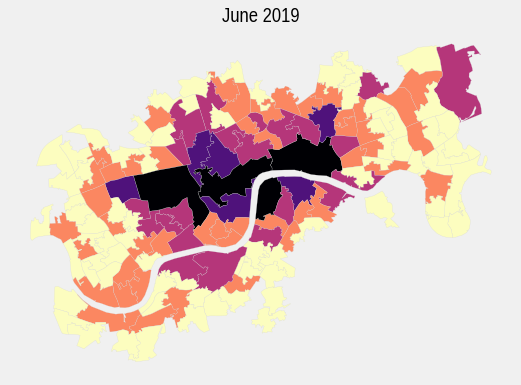

In [227]:
fig, ax1 = plt.subplots(figsize=(10,6))
c_arr_msoa_gdf.plot(ax=ax1, column='c_trips201906', legend=False, cmap = 'magma_r',
                      edgecolor='lightgrey', linewidth = 0.2,
                  scheme="User_Defined", classification_kwds=dict(bins=[125, 250,500,1000], k = 6))
ax1.axis('off')
ax1.set_title("June 2019");
fig.savefig('../output/cycle_arr_t_map_201906');

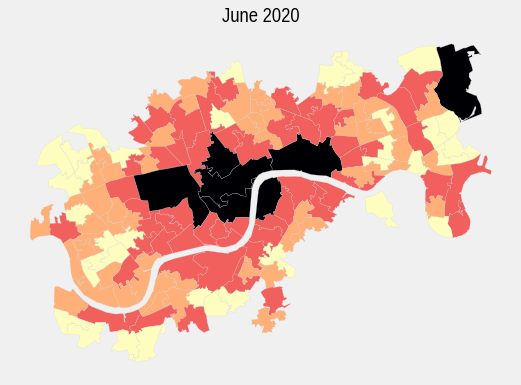

In [228]:
fig, ax2 = plt.subplots(figsize=(10,6))
c_arr_msoa_gdf.plot(ax=ax2, column='c_trips202006', legend=False, cmap = 'magma_r',
                  edgecolor='lightgrey', linewidth = 0.2,
                  scheme="User_Defined", classification_kwds=dict(bins=[125, 250,5000,1000])
                 )
ax2.axis('off')
ax2.set_title("June 2020")
fig.savefig('../output/cycle_arr_t_map_202006');

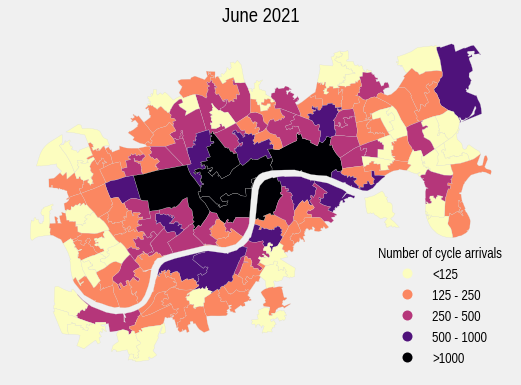

In [229]:
fig, ax3 = plt.subplots(figsize=(10,6))
legend_labels = ['<125', '125 - 250', '250 - 500', '500 - 1000', '>1000']
c_arr_msoa_gdf.plot(ax=ax3, column='c_trips202106', 
                  legend=True, 
                  cmap = 'magma_r',
                  edgecolor='lightgrey', linewidth = 0.2,
                  scheme="User_Defined", classification_kwds=dict(bins=[125, 250,500,1000]),
                  legend_kwds=dict(labels=legend_labels, loc='lower right', 
#                                    bbox_to_anchor=(1.5, 1), 
                                   title="Number of cycle arrivals", frameon=False)
                 )
ax3.axis('off')
ax3.set_title("June 2021")
fig.savefig('../output/cycle_arr_t_map_202106');

In [219]:
# fig, axes = plt.subplots(1,3, figsize=(15,6))

# legend_labels = ['<125', '125 - 250', '250 - 500', '500 - 1000', '>1000']

# c_arr_msoa_gdf.plot(ax=axes[0], column='c_trips201906', legend=False, cmap = 'magma_r',
#                       edgecolor='lightgrey', linewidth = 0.2,
#                   scheme="User_Defined", classification_kwds=dict(bins=[125, 250,500,1000], k = 6)
#                  )

# c_arr_msoa_gdf.plot(ax=axes[1], column='c_trips202006', legend=False, cmap = 'magma_r',
#                   edgecolor='lightgrey', linewidth = 0.2,
#                   scheme="User_Defined", classification_kwds=dict(bins=[125, 250,5000,1000])
#                  )

# c_arr_msoa_gdf.plot(ax=axes[2], column='c_trips202106', 
#                   legend=True, 
#                   cmap = 'magma_r',
#                   edgecolor='lightgrey', linewidth = 0.2,
#                   scheme="User_Defined", classification_kwds=dict(bins=[125, 250,500,1000]),
#                   legend_kwds=dict(labels=legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1), 
#                                    prop=dict(family='Liberation Sans Narrow'),
#                                    title="Number of cycle arrivals", frameon=False)
#                  )

# for ax in axes:
#         ax.title.set_font('Liberation Sans Narrow')
#         ax.axis('off')
        
# axes[0].set_title("June 2019");
# axes[1].set_title("June 2020");
# axes[2].set_title("June 2021");

# # fig.savefig('../export/cycle_arr_maps0');

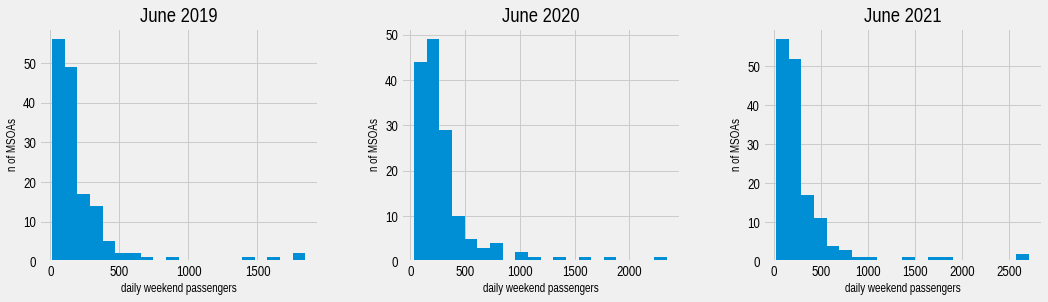

In [203]:
fig, axes = plt.subplots(1,3, figsize=(16,4))

i = 0
df = c_arr_msoa.iloc[:,1:]

for ax in axes:
    df.hist(column = df.columns[i], bins = 20, ax=ax)
    ax.title.set_font('Liberation Sans Narrow')
    i = i+1
    ax.set_xlabel('daily weekend passengers', fontsize=12)
    ax.set_ylabel('n of MSOAs', fontsize=12)

axes[0].set_title("June 2019");
axes[1].set_title("June 2020");
axes[2].set_title("June 2021");

fig.savefig('../export/c_hist')